In [ ]:
#https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
#Facebook live customer dataset

In [1]:
#import data and preview
import pandas as pd
live = pd.read_csv("Live.csv")
live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [3]:
  live.drop(['status_id','status_published','Column1','Column2','Column3','Column4'],axis=1,inplace= True)

In [4]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [5]:
s_type = {'photo': 0, 'video':1}

live['status_type'] = live['status_type'].map(s_type)

In [6]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_type    6622 non-null   float64
 1   num_reactions  7050 non-null   int64  
 2   num_comments   7050 non-null   int64  
 3   num_shares     7050 non-null   int64  
 4   num_likes      7050 non-null   int64  
 5   num_loves      7050 non-null   int64  
 6   num_wows       7050 non-null   int64  
 7   num_hahas      7050 non-null   int64  
 8   num_sads       7050 non-null   int64  
 9   num_angrys     7050 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 550.9 KB


In [7]:
live.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.0,529,512,262,432,92,3,1,1,0
1,0.0,150,0,0,150,0,0,0,0,0
2,1.0,227,236,57,204,21,1,1,0,0
3,0.0,111,0,0,111,0,0,0,0,0
4,0.0,213,0,0,204,9,0,0,0,0


In [8]:
#plotting the data to find class segmentation(distribution)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

<ipython-input-9-438baaa4eedf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = live,


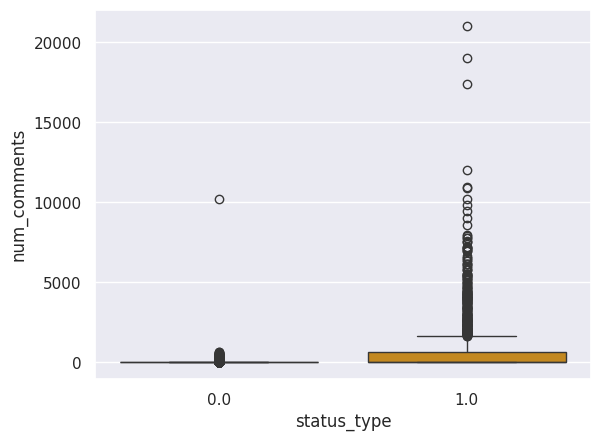

In [9]:
ax = sns.boxplot(data = live,
                 x = 'status_type',
                 y = 'num_comments',
                 palette = 'colorblind')

<ipython-input-10-75c952a93e78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = live,


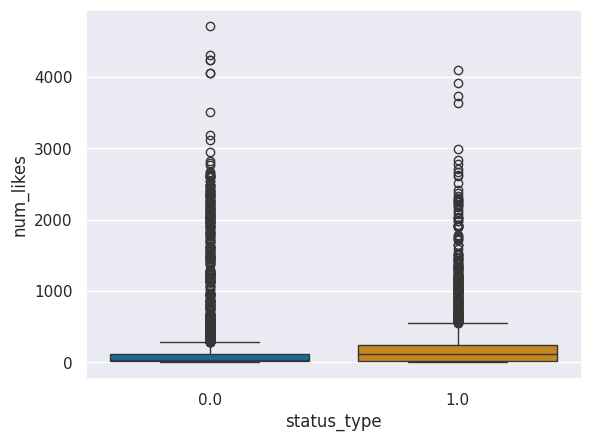

In [10]:
ax = sns.boxplot(data = live,
                 x = 'status_type',
                 y = 'num_likes',
                 palette = 'colorblind')

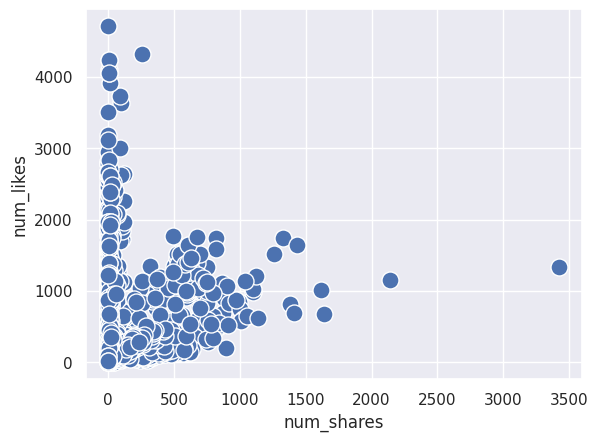

In [11]:
ax = sns.scatterplot(data = live,
                     x = 'num_shares',
                     y = 'num_likes',
                     s = 150)

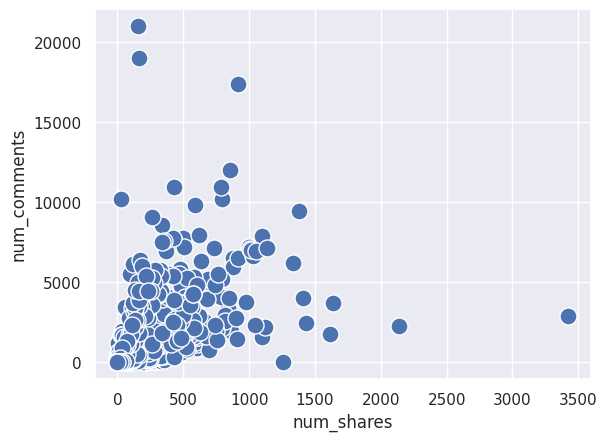

In [12]:
ax = sns.scatterplot(data = live,
                     x = 'num_shares',
                     y = 'num_comments',
                     s = 150)

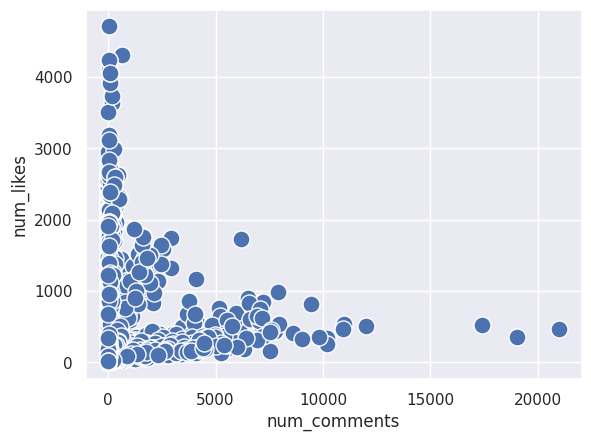

In [13]:
ax = sns.scatterplot(data = live,
                     x = 'num_comments',
                     y = 'num_likes',
                     s = 150)

In [26]:
#scaling the data to bring the data into a standard range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
live_scaled = scaler.fit_transform(live[['num_comments', 'num_likes']])

In [30]:
#create a dataframe to take only the necessary columns
live_scaled = pd.DataFrame(live_scaled,
                                columns = ['num_comments', 'num_likes'])

In [31]:
live_scaled.head()

,num_comments,num_likes
0,0.323350,0.482727
1,-0.252206,-0.144720
2,0.013089,-0.024571
3,-0.252206,-0.231495
4,-0.252206,-0.024571


In [32]:
live_scaled.describe().round(2)

,num_comments,num_likes
count,7050.00,7050.00
mean,0.00,0.00
std,1.00,1.00
min,-0.25,-0.48
25%,-0.25,-0.44
50%,-0.25,-0.35
75%,-0.23,-0.07
max,23.34,10.00


In [33]:
#Kmeans cluster creation
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [34]:
km.fit(live_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [35]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [36]:
km.inertia_

4136.6218782687865

In [37]:
#counts the number of datapoints in each clusters
pd.Series(km.labels_).value_counts().sort_index()

0    6433
1     135
2     482
Name: count, dtype: int64

In [38]:
#finding the centroids
km.cluster_centers_

array([[-0.1285127 , -0.24773307],
       [ 5.75809655,  0.34573323],
       [ 0.10244637,  3.20952878]])

In [39]:
#Changing the lists to dataframe since we cannot load list in seaborne
cluster_centers = pd.DataFrame(km.cluster_centers_,
                               columns = ['num_comments', 'num_likes'])

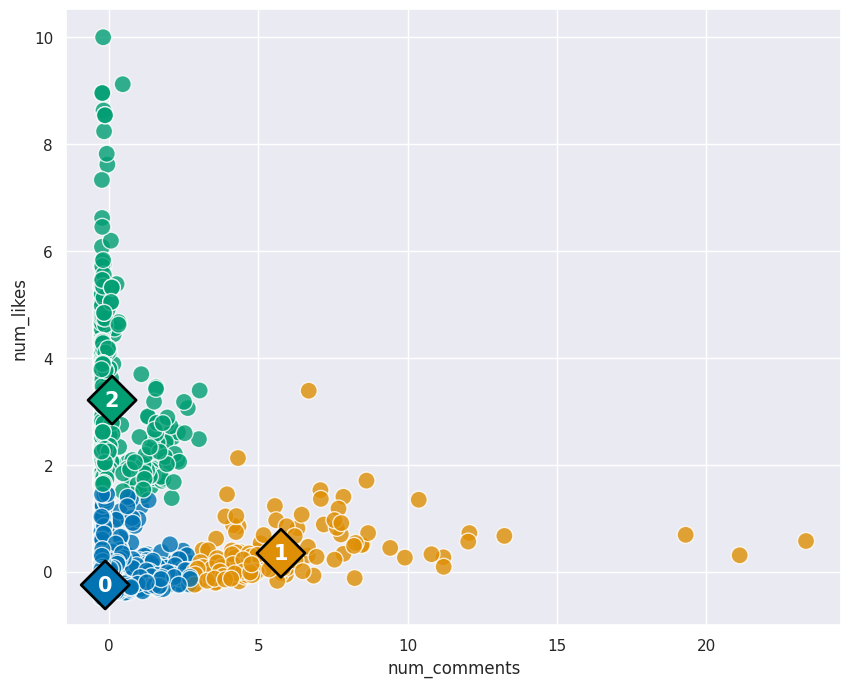

In [40]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = live_scaled,
                     x = 'num_comments',
                     y = 'num_likes',
                     hue = km.labels_,
                     palette = 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'num_comments',
                     y = 'num_likes',
                     hue = cluster_centers.index,
                     palette = 'colorblind',
                     s = 600,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.num_comments[i],
                        y = cluster_centers.num_likes[i],
                        s = i,
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

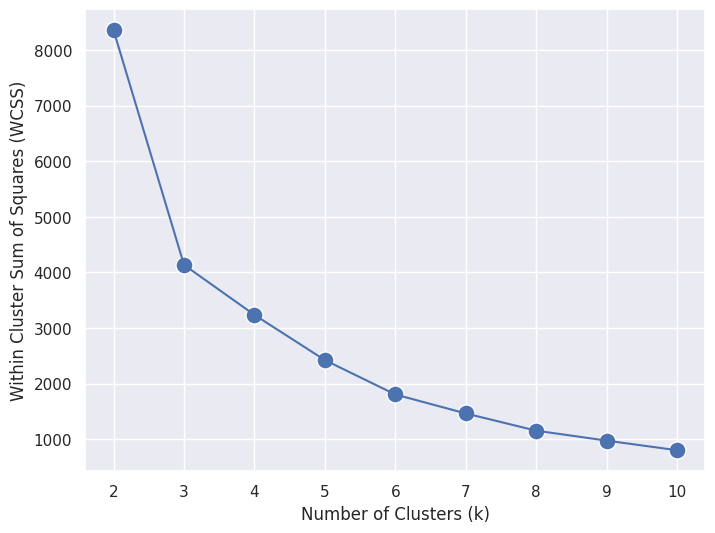

In [42]:
#Elbow method (WCSS) to choose right number of clusters
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(live_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

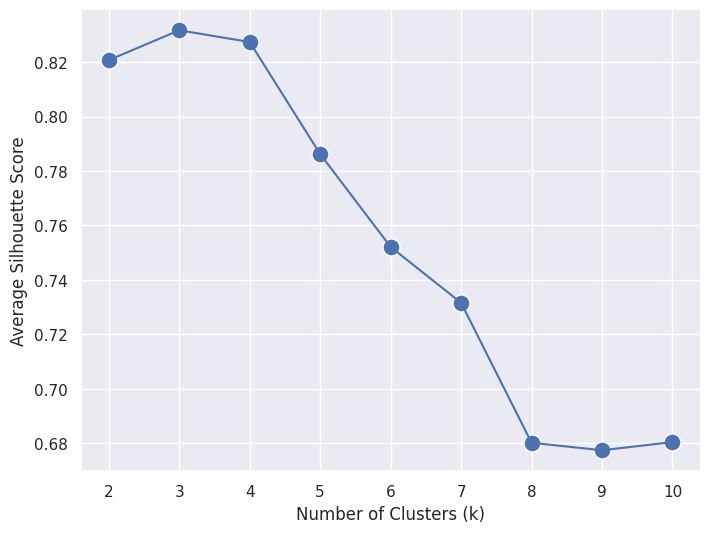

In [43]:
#Average Silhouette method
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(live_scaled)
    silhouette.append(silhouette_score(live_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Average Silhouette Score')

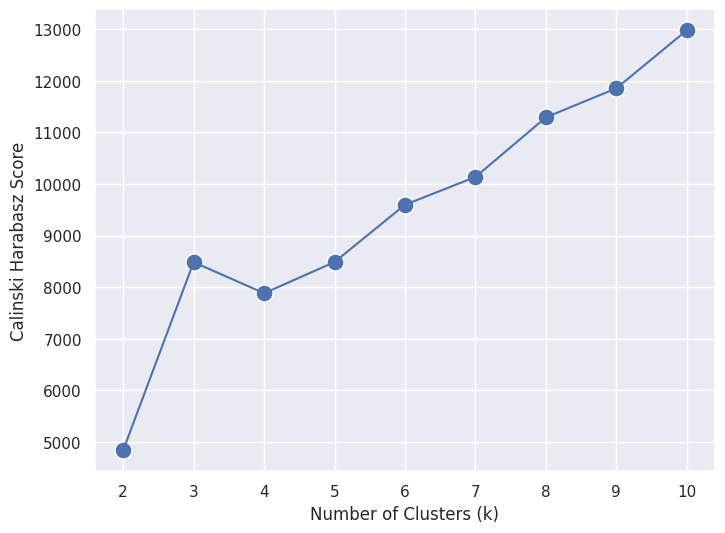

In [44]:
#Calinski Harabasz Score
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(live_scaled)
    calinski.append(calinski_harabasz_score(live_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Calinski Harabasz Score')

In [45]:
#Analyse and interpret the clusters
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)
km.fit(live_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [ ]:
pd.Series(km.labels_).value_counts().sort_index()

0    6433
1     135
2     482
Name: count, dtype: int64

In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['num_comments', 'num_likes'])

In [ ]:
live['Cluster'] = km.labels_.tolist()
live.head(10)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,1.0,529,512,262,432,92,3,1,1,0,0
1,0.0,150,0,0,150,0,0,0,0,0,0
2,1.0,227,236,57,204,21,1,1,0,0,0
3,0.0,111,0,0,111,0,0,0,0,0,0
4,0.0,213,0,0,204,9,0,0,0,0,0
5,0.0,217,6,0,211,5,1,0,0,0,0
6,1.0,503,614,72,418,70,10,2,0,3,0
7,1.0,295,453,53,260,32,1,1,0,1,0
8,0.0,203,1,0,198,5,0,0,0,0,0
9,0.0,170,9,1,167,3,0,0,0,0,0


In [ ]:
#Since only 0 is visisble in head, rechecking the unique values in the cluster column to make sure all 3 clusters are there
live.Cluster.unique()

array([0, 2, 1])

In [ ]:
live = pd.get_dummies(live, columns = ['status_type'])
live.head(10)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster,status_type_0.0,status_type_1.0
0,529,512,262,432,92,3,1,1,0,0,False,True
1,150,0,0,150,0,0,0,0,0,0,True,False
2,227,236,57,204,21,1,1,0,0,0,False,True
3,111,0,0,111,0,0,0,0,0,0,True,False
4,213,0,0,204,9,0,0,0,0,0,True,False
5,217,6,0,211,5,1,0,0,0,0,True,False
6,503,614,72,418,70,10,2,0,3,0,False,True
7,295,453,53,260,32,1,1,0,1,0,False,True
8,203,1,0,198,5,0,0,0,0,0,True,False
9,170,9,1,167,3,0,0,0,0,0,True,False


In [ ]:
live.agg({
    'status_type_0.0': 'mean',
    'status_type_1.0': 'mean',
    'num_likes': 'median',
    'num_shares': 'median',
    'num_comments': 'median'}).round(2)

status_type_0.0     0.61
status_type_1.0     0.33
num_likes          58.00
num_shares          0.00
num_comments        4.00
dtype: float64

In [ ]:
live.groupby('Cluster').agg({
    'status_type_0.0': 'mean',
    'status_type_1.0': 'mean',
    'num_likes': 'median',
    'num_shares': 'median',
    'num_comments': 'median'}).round(2)

,status_type_0.0,status_type_1.0,num_likes,num_shares,num_comments
Cluster,,,,,
0,0.63,0.32,45.0,0.0,3.0
1,0.01,0.99,307.0,366.0,4444.0
2,0.46,0.34,1468.5,3.0,26.0
